In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Useful functions to plot and generate problem instances

In [2]:
def generate_tsp_instance(number_of_cities, grid_size):
    ans = []
    while len(ans) < number_of_cities:
        (x, y) = randint(0, grid_size, size=2)
        if (x, y) not in ans:
            ans.append((x, y))
    return ans

In [3]:
def plot_instance(instance, grid_size):
    plt.close()
    for i, city in enumerate(instance):
        plt.plot(city[0], city[1], 'o', color='red')
        plt.annotate(i, xy=(city[0], city[1]), xytext=(-8, 8),
        textcoords='offset points')
    plt.grid()
    plt.xlim((-0.5, grid_size+0.5))
    plt.ylim((-0.5, grid_size+0.5))

In [4]:
def plot_tour(instance, grid_size, tour):
    plt.close()
    plot_instance(instance, grid_size)
    for i in range(0, len(tour)-1):
        x = tsp_instance[tour[i]][0] 
        y = tsp_instance[tour[i]][1] 
        dx = tsp_instance[tour[i+1]][0] -x 
        dy = tsp_instance[tour[i+1]][1] -y
        plt.arrow(x, y, dx, dy, color='blue')
    x = tsp_instance[tour[-1]][0] 
    y = tsp_instance[tour[-1]][1] 
    dx = tsp_instance[tour[0]][0] -x 
    dy = tsp_instance[tour[0]][1] -y
    plt.arrow(x, y, dx, dy, color='blue')

### Generate an instance of TSP

In [5]:
number_of_cities = 20
grid_size = 100
tsp_instance = generate_tsp_instance(number_of_cities, grid_size)

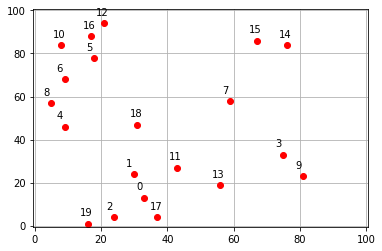

In [6]:
plot_instance(tsp_instance, grid_size)

### Generate and plot a random tour

In [7]:
tour = np.random.permutation(number_of_cities)
tour

array([ 2, 17,  6, 15,  5,  7, 10,  8,  4, 13,  3, 16, 11, 12,  9, 14, 19,
       18,  1,  0])

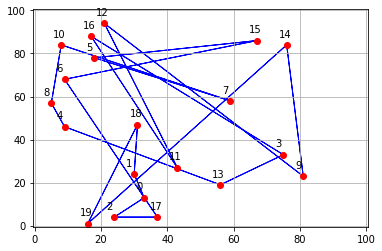

In [8]:
plot_tour(tsp_instance, grid_size, tour)

### Quantify tours -- distance

In [9]:
def distance(city1, city2):
    x_distance = abs(city1[0] - city2[0])
    y_distance = abs(city1[1] - city2[1])
    return np.sqrt(x_distance**2 + y_distance**2)

In [10]:
def cost(tour, tsp_instance):
    cost = 0
    for i in range(0, len(tour)-1):
        cost += distance(tsp_instance[tour[i]], tsp_instance[tour[i+1]])
    cost += distance(tsp_instance[tour[-1]], tsp_instance[tour[0]])
    return cost

In [11]:
tour

array([ 2, 17,  6, 15,  5,  7, 10,  8,  4, 13,  3, 16, 11, 12,  9, 14, 19,
       18,  1,  0])

In [12]:
cost(tour, tsp_instance)

981.646018729876

### Perturbation of tours

In [13]:
def perturb(tour):
    # choose two cities at random
    i, j = np.random.choice(len(tour), 2, replace=False)
    new_tour = np.copy(tour)
    # swap them
    new_tour[i], new_tour[j] =  new_tour[j], new_tour[i]
    return new_tour

In [14]:
another_tour = perturb(tour)

In [15]:
tour

array([ 2, 17,  6, 15,  5,  7, 10,  8,  4, 13,  3, 16, 11, 12,  9, 14, 19,
       18,  1,  0])

In [16]:
another_tour

array([ 2, 17,  6, 15,  5, 14, 10,  8,  4, 13,  3, 16, 11, 12,  9,  7, 19,
       18,  1,  0])

In [ ]:
cost(another_tour, tsp_instance)

In [17]:
def SA_TSP(tsp_instance, perturbations_per_annealing_sep, t0, 
           cooling_factor):
    number_of_cities = len(tsp_instance)
    current_solution = np.random.permutation(number_of_cities) 
    t = t0
    while t > 0.001:
        for _ in range(perturbations_per_annealing_sep):
            current_value = cost(current_solution, tsp_instance)
            
            perturbation = perturb(current_solution)
            perturbation_value = cost(perturbation, tsp_instance)
            
            delta = perturbation_value - current_value
            if delta < 0: 
                current_solution = perturbation
                current_value = perturbation_value
            elif np.random.rand() < np.exp(-delta/t): 
                current_solution = perturbation
                current_value = perturbation_value
        t = cooling_factor*t
    return current_solution, cost(current_solution, tsp_instance)

In [22]:
solution_tour, cost_solution = SA_TSP(tsp_instance, perturbations_per_annealing_sep=100, t0=100, cooling_factor=0.99)

In [23]:
solution_tour

array([10,  5,  6,  8,  4, 18,  1, 19,  2, 17,  0, 11, 13,  9,  3,  7, 14,
       15, 12, 16])

In [24]:
cost_solution

355.05299552463333

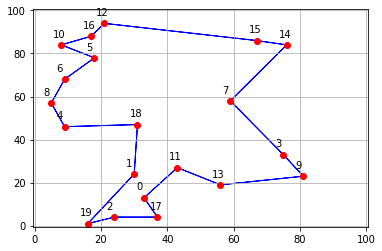

In [25]:
plot_tour(tsp_instance, grid_size, solution_tour)